In [1]:
# 1
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt

In [2]:
# 2
ori_path = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/'
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
file_list = os.listdir(ori_path)
name = [
'Station ID',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second',
'Time since the epoch [s]',
'Sequence Number',
'Ambient Temperature',
'Surface Temperature',
'Solar Radiation',
'Relative Humidity [%]',
'Soil Moisture [%]',
'Watermark [kPa]',
'Rain Meter [mm]',
'Wind Speed [m/s]',
'Wind Direction [°]',
]

In [3]:
# 3
df_sum = pd.DataFrame()
sum = 0
for file in file_list:
    if '.txt'in file:
        df = pd.read_csv(ori_path+file,sep=' ',names=name)
        df_sum = pd.concat([df_sum,df],axis=0)
        sum += len(df)
        print(file,'Done')

sensorscope-meteo-99.txt Done
sensorscope-meteo-87.txt Done
sensorscope-meteo-17.txt Done
sensorscope-meteo-53.txt Done
sensorscope-meteo-68.txt Done
sensorscope-meteo-24.txt Done
sensorscope-meteo-39.txt Done
sensorscope-meteo-85.txt Done
sensorscope-meteo-34.txt Done
sensorscope-meteo-49.txt Done
sensorscope-meteo-42.txt Done
sensorscope-meteo-104.txt Done
sensorscope-meteo-95.txt Done
sensorscope-meteo-96.txt Done
sensorscope-meteo-32.txt Done
sensorscope-meteo-40.txt Done
sensorscope-meteo-23.txt Done
sensorscope-meteo-18.txt Done
sensorscope-meteo-60.txt Done
sensorscope-meteo-25.txt Done
sensorscope-meteo-37.txt Done
sensorscope-meteo-122.txt Done
sensorscope-meteo-79.txt Done
sensorscope-meteo-56.txt Done
sensorscope-meteo-31.txt Done
sensorscope-meteo-100.txt Done
sensorscope-meteo-10.txt Done
sensorscope-meteo-97.txt Done
sensorscope-meteo-94.txt Done
sensorscope-meteo-11.txt Done
sensorscope-meteo-70.txt Done
sensorscope-meteo-59.txt Done
sensorscope-meteo-82.txt Done
sensors

In [4]:
df_sum.to_hdf('r_data_files/data_ori.h5',key='df',mode='w')

In [5]:
# 4
lat = (46.51788,46.52227)
log = (6.56517,6.5693)

loc_file = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/EPFL_sensor_loc_simple2.xlsx'
df = pd.read_excel(loc_file)

lat_range = np.linspace(lat[0],lat[1],11)
log_range = np.linspace(log[0],log[1],11)
# print(lat_range)
# print(log_range)

In [24]:
# 5
def draw_lune_heatmap(df,res,lat=lat,log=log):
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            pic[i][j] = len(sub_df)
            if len(sub_df) > 0:
                pic2[i][j]=1
            # pic[i][j] = i*res+j
            if len(sub_df) >= 1:
                pairs.append([i*res+j,sub_df['ID'].values])
            max_value = 0
            max_id = 0
            for value in sub_df['ID'].values:
                # print(value)
                if len(sub_df[sub_df['ID'] == value]) > max_value:
                    max_id =value
            pic[i][j] = max_id
    return pic,pairs,pic2
# 输出的pic有颜色明暗，pic2为黑白两色

[[10, array([63])], [14, array([ 3, 23, 42])], [15, array([ 5, 17])], [20, array([47])], [21, array([7])], [22, array([27])], [24, array([21, 26, 41])], [25, array([14, 30, 39, 56])], [26, array([  9,  15,  18,  24,  37,  44, 105, 121])], [27, array([12, 45, 46])], [28, array([ 8, 25, 36])], [32, array([111])], [33, array([64, 75, 99])], [34, array([57])], [35, array([59])], [36, array([13, 40])], [37, array([ 34,  43, 106])], [41, array([61])], [42, array([71])], [43, array([65])], [45, array([82])], [46, array([62])], [48, array([76])], [51, array([51])], [52, array([11])], [53, array([ 70, 122])], [54, array([49, 68])], [57, array([60])], [60, array([84])], [61, array([81])], [62, array([55])], [63, array([66, 72])], [64, array([54, 73])], [66, array([ 32,  35,  50,  94, 107])], [67, array([31])], [68, array([69])], [69, array([79, 95])], [70, array([103])], [71, array([80])], [72, array([96])], [75, array([92, 97])], [76, array([100])], [77, array([33, 53])], [78, array([10, 19])],

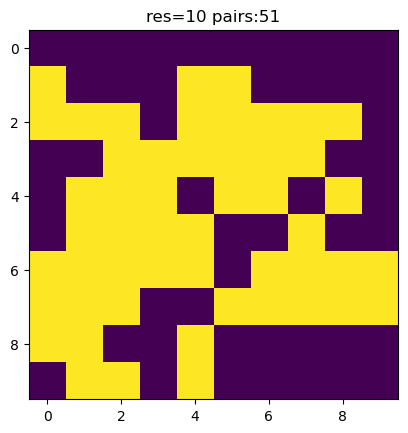

In [25]:
# 6
res = 10
pic,pairs,pic2 = draw_lune_heatmap(df,res,lat,log)
plt.title('res='+str(res)+' pairs:'+str(len(pairs)))
plt.grid(b=False)
plt.imshow(pic2)
print(pairs)
print(pic)

In [26]:
pairs

[[10, array([63])],
 [14, array([ 3, 23, 42])],
 [15, array([ 5, 17])],
 [20, array([47])],
 [21, array([7])],
 [22, array([27])],
 [24, array([21, 26, 41])],
 [25, array([14, 30, 39, 56])],
 [26, array([  9,  15,  18,  24,  37,  44, 105, 121])],
 [27, array([12, 45, 46])],
 [28, array([ 8, 25, 36])],
 [32, array([111])],
 [33, array([64, 75, 99])],
 [34, array([57])],
 [35, array([59])],
 [36, array([13, 40])],
 [37, array([ 34,  43, 106])],
 [41, array([61])],
 [42, array([71])],
 [43, array([65])],
 [45, array([82])],
 [46, array([62])],
 [48, array([76])],
 [51, array([51])],
 [52, array([11])],
 [53, array([ 70, 122])],
 [54, array([49, 68])],
 [57, array([60])],
 [60, array([84])],
 [61, array([81])],
 [62, array([55])],
 [63, array([66, 72])],
 [64, array([54, 73])],
 [66, array([ 32,  35,  50,  94, 107])],
 [67, array([31])],
 [68, array([69])],
 [69, array([79, 95])],
 [70, array([103])],
 [71, array([80])],
 [72, array([96])],
 [75, array([92, 97])],
 [76, array([100])],
 [77

In [40]:
id_list = []
for pair in pairs:
    # print(pair[1])
    max_length = 0
    max_id = 0
    for i, id in enumerate(pair[1]):
        tmp_df = df_sum[df_sum['Station ID'] == id]
        if(len(tmp_df) > max_length):
            max_length = len(tmp_df)
            max_id = id
        # print(id,len(tmp_df))
    id_list.append(max_id)
    # print("------")
    # print(max_id,max_length)
    # print("______")
id_array = np.array(id_list)

In [41]:
total_id = df_sum['Station ID'].values
total_uniq = np.unique(total_id)
print(total_uniq,len(total_uniq))

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122] 88


In [42]:
np.sort(id_array)

array([  7,   8,  11,  14,  17,  19,  23,  26,  27,  31,  33,  34,  35,
        40,  46,  47,  49,  51,  55,  57,  59,  60,  61,  62,  63,  65,
        69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,  84,  87,
        88,  89,  93,  96,  97,  98, 100, 103, 104, 109, 111, 121])

In [43]:
len(id_array)

51

In [44]:
dfs = pd.DataFrame()
for id in id_array:
    df_tmp = df_sum[df_sum['Station ID'] == id]
    dfs = pd.concat([dfs,df_tmp],axis=0)

In [45]:
len(dfs)

21797635

In [46]:
df_sub = dfs.drop(['Solar Radiation','Soil Moisture [%]','Watermark [kPa]','Rain Meter [mm]','Wind Speed [m/s]','Wind Direction [°]'],axis=1)

In [47]:
df_sub.to_hdf('r_data_files/df_sub.h5',key='df_sub',mode='w')